In [1]:
# Import libraries for building model
from sklearn.cluster import KMeans
# Import libraries for data processing
import pandas as pd
from sklearn.model_selection import train_test_split
# Import libraries for visualize data
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt
# Import other libraries
import numpy as np

In [2]:
%matplotlib inline

## Preprocess Dataset

In [3]:
# Load dataset
cortex_nuc = pd.read_csv("../input/Data_Cortex_Nuclear.csv", sep=',')

In [4]:
# View first 10 row of data
cortex_nuc.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Behavior,Treatment,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,C/S,Memantine,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,C/S,Memantine,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,C/S,Memantine,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,C/S,Memantine,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,C/S,Memantine,c-CS-m


In [5]:
# View last 5 row of data
cortex_nuc.tail()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Behavior,Treatment,class
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,S/C,Saline,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,S/C,Saline,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,S/C,Saline,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,S/C,Saline,t-SC-s
1079,J3295_15,0.302626,0.461059,0.256564,2.092790,2.594348,0.251001,0.191811,2.361816,0.223632,...,0.187556,0.420347,0.335062,0.252995,0.365278,1.370999,Ts65Dn,S/C,Saline,t-SC-s


In [6]:
# View info about dataset
cortex_nuc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

In [7]:
# Check number of samples
len(cortex_nuc)

1080

In [8]:
# Drop NA
cortex_nuc.dropna(inplace=True)

In [9]:
# Check number of samples of clear dataset
len(cortex_nuc)

552

In [10]:
# View on info about clear dataset
cortex_nuc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 552 entries, 75 to 1049
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          552 non-null    object 
 1   DYRK1A_N         552 non-null    float64
 2   ITSN1_N          552 non-null    float64
 3   BDNF_N           552 non-null    float64
 4   NR1_N            552 non-null    float64
 5   NR2A_N           552 non-null    float64
 6   pAKT_N           552 non-null    float64
 7   pBRAF_N          552 non-null    float64
 8   pCAMKII_N        552 non-null    float64
 9   pCREB_N          552 non-null    float64
 10  pELK_N           552 non-null    float64
 11  pERK_N           552 non-null    float64
 12  pJNK_N           552 non-null    float64
 13  PKCA_N           552 non-null    float64
 14  pMEK_N           552 non-null    float64
 15  pNR1_N           552 non-null    float64
 16  pNR2A_N          552 non-null    float64
 17  pNR2B_N          55

In [11]:
# View on clear dataset
cortex_nuc.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Behavior,Treatment,class
75,3415_1,0.649781,0.828696,0.405862,2.921435,5.167979,0.207174,0.176640,3.728084,0.239283,...,0.129363,0.486912,0.125152,0.146865,0.143517,1.627181,Control,C/S,Memantine,c-CS-m
76,3415_2,0.616481,0.841974,0.388584,2.862575,5.194163,0.223433,0.167725,3.648240,0.221030,...,0.143084,0.467833,0.112857,0.161132,0.145719,1.562096,Control,C/S,Memantine,c-CS-m
77,3415_3,0.637424,0.852882,0.400561,2.968155,5.350820,0.208790,0.173261,3.814545,0.222300,...,0.147673,0.462501,0.116433,0.160594,0.142879,1.571868,Control,C/S,Memantine,c-CS-m
78,3415_4,0.576815,0.755390,0.348346,2.624901,4.727509,0.205892,0.161192,3.778530,0.194153,...,0.121290,0.479110,0.102831,0.144238,0.141681,1.646608,Control,C/S,Memantine,c-CS-m
79,3415_5,0.542545,0.757917,0.350051,2.634509,4.735602,0.210526,0.165671,3.871971,0.194297,...,0.142617,0.438354,0.110614,0.155667,0.146408,1.607631,Control,C/S,Memantine,c-CS-m


## Visualize data

In [12]:
# Visualize correlation between features
cortex_nuc.drop(columns=["MouseID", "Genotype", "Behavior", "Treatment", "class"])\
            .corr().style.background_gradient(cmap="GnBu")

In [13]:
# Set X, y variables
x_val = cortex_nuc["class"].to_numpy()
y_val = cortex_nuc["SHH_N"].to_numpy()

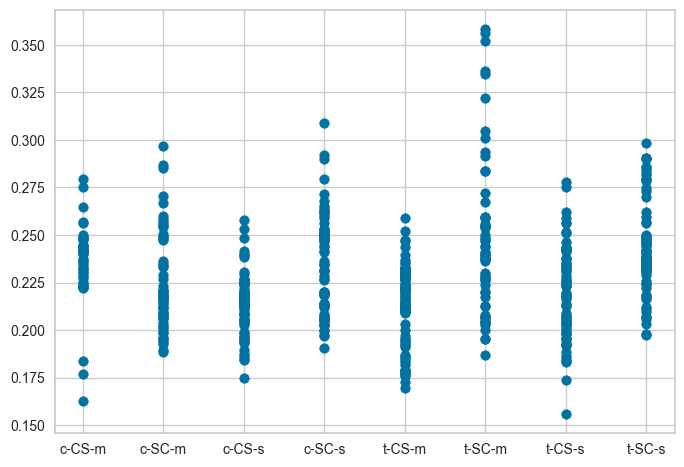

In [14]:
# Visualize DYRK1A_N protein vs class graph
plt.scatter(x_val, y_val)
plt.show()

In [15]:
# Delete high correlated features
# Reduce number of features from 82 to 10
cortex_nuc = cortex_nuc[["MouseID", "AcetylH3K9_N", "RRP1_N", "SHH_N", "GFAP_N", "GluR3_N",
                        "Genotype", "Behavior", "Treatment", "class"]]

In [16]:
# View correlation between remained features
cortex_nuc.drop(columns=["MouseID", "Genotype", "Behavior", "Treatment", "class"])\
            .corr().style.background_gradient(cmap="GnBu")

,AcetylH3K9_N,RRP1_N,SHH_N,GFAP_N,GluR3_N
AcetylH3K9_N,1.000000,0.241938,0.019342,0.317940,-0.138619
RRP1_N,0.241938,1.000000,0.067816,0.420827,0.005160
SHH_N,0.019342,0.067816,1.000000,0.037685,-0.062287
GFAP_N,0.317940,0.420827,0.037685,1.000000,0.098705
GluR3_N,-0.138619,0.005160,-0.062287,0.098705,1.000000


In [17]:
# View on new dataframe
cortex_nuc.head()

,MouseID,AcetylH3K9_N,RRP1_N,SHH_N,GFAP_N,GluR3_N,Genotype,Behavior,Treatment,class
75,3415_1,0.134639,0.158178,0.239752,0.128145,0.292461,Control,C/S,Memantine,c-CS-m
76,3415_2,0.136273,0.161579,0.249031,0.134583,0.291489,Control,C/S,Memantine,c-CS-m
77,3415_3,0.135914,0.167508,0.247956,0.129555,0.270062,Control,C/S,Memantine,c-CS-m
78,3415_4,0.126091,0.144363,0.233225,0.119356,0.276939,Control,C/S,Memantine,c-CS-m
79,3415_5,0.124348,0.153741,0.244469,0.128635,0.283371,Control,C/S,Memantine,c-CS-m


## Determine the number of clusters

In [18]:
# Define data and target values
X_data = cortex_nuc.drop(columns=["MouseID", "Genotype", "Behavior", "Treatment", "class"]).to_numpy()
# y_target = cortex_nuc[].to_numpy()

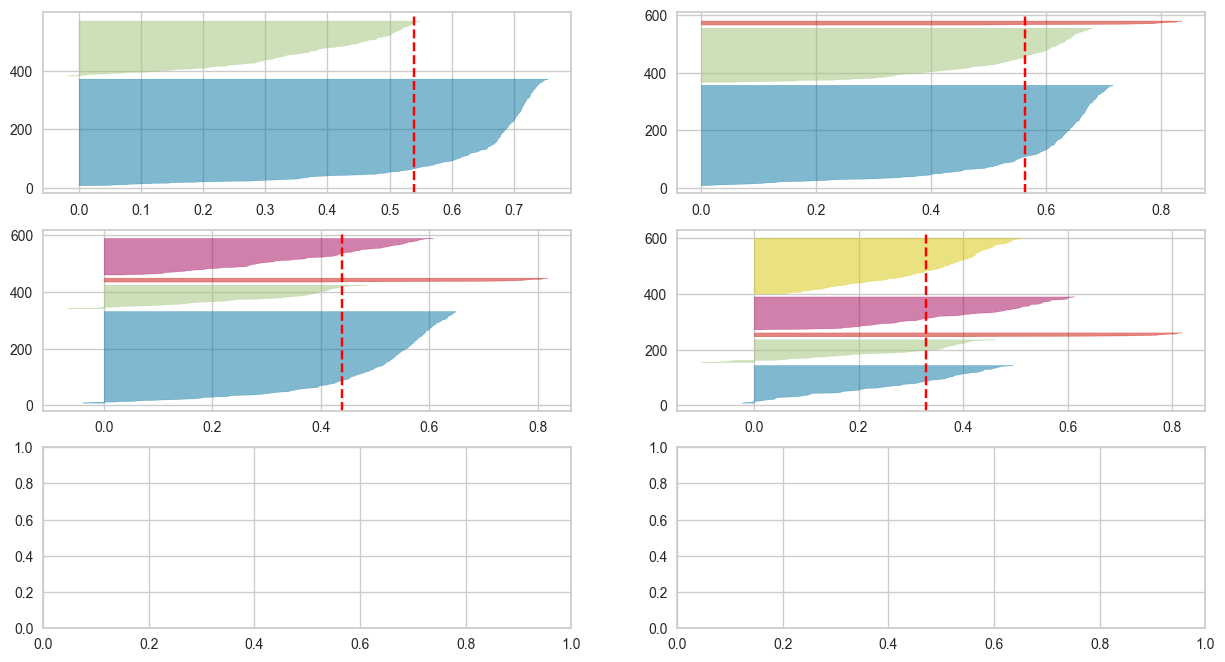

In [19]:
# Visualize Silhouette algorithm for finding best number of clusters
fig, ax = plt.subplots(3, 2, figsize=(15, 8))
for i in [2, 3, 4, 5]:
    # # Create Kmean instances for different number of clusters
    km = KMeans(n_clusters=i, init="k-means++", n_init=10, max_iter=100, random_state=17)
    q, mod = divmod(i, 2)
    # # Create SilhouetteVisualizer instance with KMeans instance.
    # Fit the visualizer
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_data)

In the result we see that Silhouette score high in 3 cluster size.

## Fit the k-means model

In [20]:
# Define the K-NN model
k_model = KMeans(n_clusters=3, n_init=10)

In [21]:
# Fit the model
k_model.fit(X_data)

KMeans(n_clusters=3, n_init=10)

In [22]:
# Predict cluster
y_clust = k_model.predict(X_data)

In [23]:
# Retrieve unique clusters
u_clusters = np.unique(y_clust)

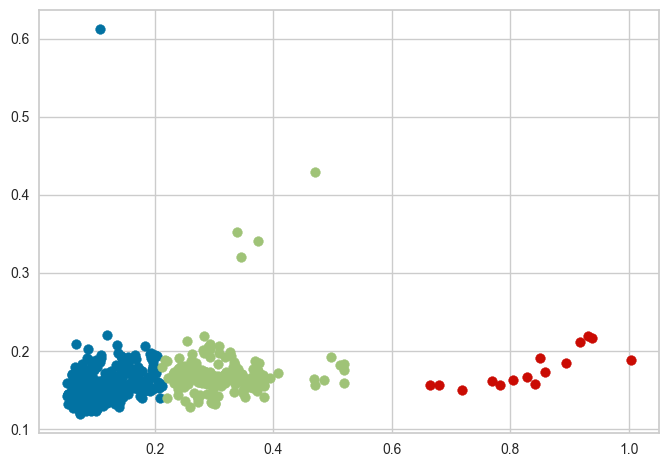

In [24]:
# Create scatter plot for samples from each cluster
for cluster in u_clusters:
    # Get row indexes for samples with this cluster
    row_ix = np.where(y_clust == cluster)
    # Create scatter of these samples
    plt.scatter(X_data[row_ix, 0], X_data[row_ix, 1])
# Show the plot
plt.show()